<h2> DATA 115: Introduction to Data Analytics. Fall 2024 </h2>
<h3> Problem Set 2 </h3>
<h3> Team <i> 7 </i></h3>
<h3> Abdelaziz Hammad,  Jeff Calderon </h3>

#### 1. In your own words, provide a definition or a short description for each of the following terms (and explain how they are different for the pairs of items):

##### (a) Bar chart vs Histogram

##### (b) Mean vs Median

##### (c) Pearson correlation vs Spearman's rank correlation

<h3>Bar chart vs Histogram </h3>
<p> A Bar chart has two axes which can represent numerical and categorical data. 
    In a column bar chart the horizontal axes will show categories and the vertical axes might show a value associated with each category. 
    For instance you might be reporting exam scores from students in a class, so the names of each would be on the horizontal and their scores on the vertical axes. 
    A histogram shows a distribution of a continuos numerical value. In keeping with the previous example, a histogram would show us the distribution of scores on the exam. We would set appropriate bin sizes and count the number of students which scored within each bin. The horizontal axes would show bin sizes, while the vertical height of the bin represents the number of students within that bin. The bins are also typically touching, unlike a bar graph which separates the bars. Since in the bar graph each bar represents a different category</p>
<h3>Mean vs Median</h2>
<p>Mean and median are both measures of central tendency. So they both inform us about what any observation is likely to be within a sample. They differ in important ways. The statistical mean is the result of averaging all the numbers. Simply add all the measured value of each observation and divide by the number of observations. The median is found by lining up all the values, sorted smallest to greatest, then determining the middle value. The mean is useful but is sensitive to outliers. In other words, infrequent but large magnitude observations might move the mean such that it is not representative of the central tendency. If most students received 99/100 but a few received 0/100 by not showing up on exam day, the mean will be affected downward and misrepresent the average score of test takers. On the other hand the mean will not be as affected.</p>
<h3>Pearson Correlation VS Spearman's Rank Correlation </h3>
<p> Pearson correlation is a way to determine the extent to which two continuous variables are related linearly. 
Two continuous variables would be a person weight (W) and Height (H). 
If we measure height vs weight then for any value H there is a value W for the same observation, 
so when compare how each value of H tends to vary with W using a pearson correlation, it will indicate if they are moving together in a line. 
If when H increases W also increases then they are positively correlated and the Pearson correlation would be positive. 
If W decreases as H increases (or vice-versa), then the correlation is negative.
The Pearson Correlation is normalized so that the number is always in between -1 and 1. A zero Pearson correlation would indicate that there is no linear correlation.
</p><p> Spearman's Rank Correlation is another way to test for a relationship between two variables but is more general and applicable in more circumstances. 
It can be used to check if one variable increases/decreases as the other increases/decrease in a way that measures how consistent those increases or decreases are.
 It does so based by ranking the two variables and examining how the differences in ranks vary  in each data point. 
 For instance if the heaviest person (rank 1) was the second tallest (rank 2) than this would have difference of -1. 
 Summing up these differences and normalizing (among other things) is how we reach a value between -1 and 0.  
</p>

#### 2. Load the data in `GME_Stock` as a dataframe in Python. 

##### (a) Plot the values in the closing prices column as a line plot.

##### (b) Make a scatterplot of opening prices vs. closing prices.

##### (c) Add a new column to your dataframe whose rows represent the change in price during each day and make a histogram of these values.

##### (d) Make a bar chart presenting the in-state tuition data presented in this table:

| School | WSU | EWU | UW | UI | CWU |
|:-:|:-:|:-:|:-:|:-:|:-:|
| **Tuition** | 11841 | 7526 | 11465 | 8304 | 8273 |


##### (e) Provide a brief justification for the order you placed the bars from left to right in (d).

(A) Line Plot


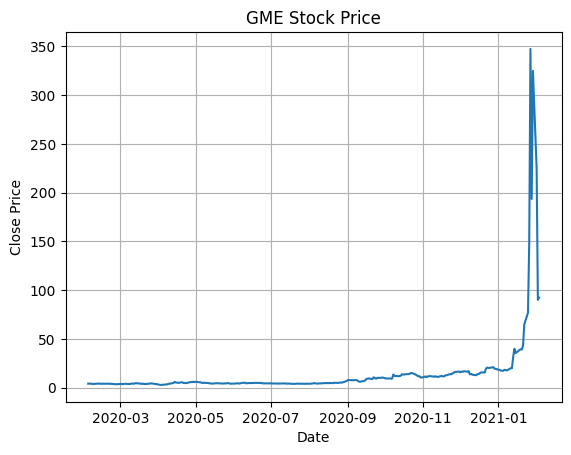

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('GME_Stock.csv')
data.head(2)
data.Date = pd.to_datetime(data.Date)
x_values = data.Date
y_values = data.Close

#line plot
print('A Line Plot')
fig, ax = plt.subplots()
ax.plot(x_values, y_values)
ax.set(xlabel='Date', ylabel='Close Price', title='GME Stock Price')
ax.grid()
#plt.show()



(B) Scatter Plot


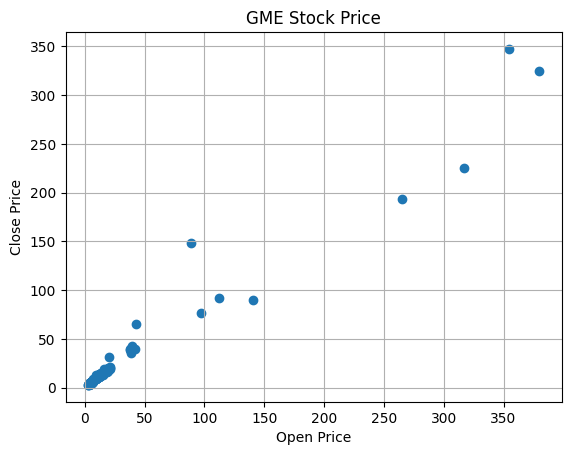

In [19]:
data.columns
fig2, ax2 = plt.subplots()
ax2.scatter(data.Open, data.Close)
ax2.set(xlabel='Open Price', ylabel='Close Price', title='GME Stock Price')
ax2.grid()
print('(B) Scatter Plot')
plt.show()

        Date  Open  High   Low  Close  Adj Close   Volume  Price Change  \
0 2020-02-04  4.03  4.25  3.97   4.07       4.07  3563100          0.04   
1 2020-02-05  4.15  4.41  4.14   4.18       4.18  2641700          0.03   

   PriceChange  
0         0.04  
1         0.03  


(C) Histogram


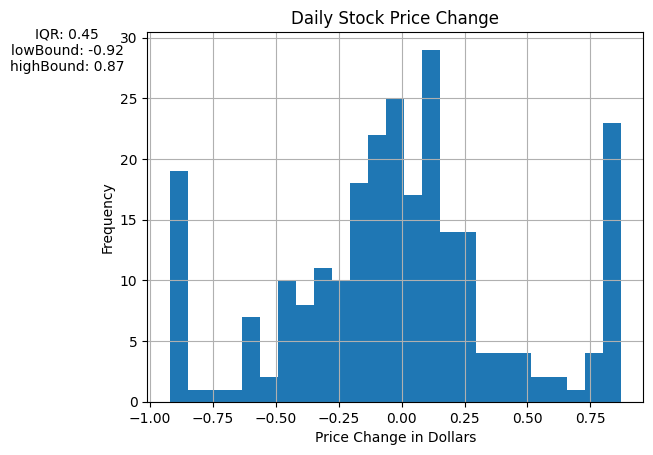

In [49]:
# Add a new column 
data['PriceChange'] = data.Close - data.Open

# Check that it worked
print(data.head(2))

# More informative without the outliers
Q1 = data['PriceChange'].quantile(0.25)
Q3 = data['PriceChange'].quantile(0.75)
IQR = Q3 - Q1
lowBound = round(Q1 - 1.5 * IQR, 2)
highBound = round(Q3 + 1.5 * IQR, 2)
IQR = round(IQR, 2)
#remove outliers
clipped_data = data['PriceChange'].clip(lower=lowBound, upper=highBound)

#Now we can make a histogram
fig3, ax3 = plt.subplots()
print('\n\n(C) Histogram')
ax3.hist(clipped_data, bins=25)
ax3.set(xlabel='Price Change in Dollars', ylabel='Frequency', title='Daily Stock Price Change')
plt.gcf().text(0, 0.8, f'IQR: {IQR}\nlowBound: {lowBound}\nhighBound: {highBound}', ha = 'center', fontsize = 10)

ax3.grid()
plt.show()




#### 3. Load the data in `COL` as a dataframe in Python. 

##### (a) Decide which rows are outliers in this data and describe and justify how you determined their outlier status.

##### (b) For each row you identified, if you were performing EDA on this dataset, would you include its values in your analysis and plots? Why or why not?

##### (c) Make a scatterplot matrix of the numeric columns.

##### (d) Write a brief (no more than three sentences) summary of what you observe in the plot in (c).

##### (e) Choose a single subplot that seems most interesting to you and make a separate scatterplot of just those two columns with the points colored by the salary value.

##### (f) Write a brief (no more than two sentences) summary of what you observe in the plot in (e).

#### 4. Load the data in `Height_Weight_Age_Sex` as a dataframe in Python.

##### (a) Create boxplots for the height and weight columns separately. Comment on the symmetry and skewness, if any, for their distributions using these plots.

##### (b) Create histograms for the height and weight columns separately. Comment on the symmetry and skewness, if any, for their distributions using these plots. Are your conclusions based on the boxplots consistent with those based on densities? 

##### (c) Create separate boxplots for the weight data separated by the male variable. What do you observe about the two distributions?

##### (d) Define variable `BMI`, applying the [formula for metric system](https://www.thecalculatorsite.com/articles/health/bmi-formula-for-bmi-calculations.php): $BMI = Weight / (\frac{Height}{100})^2$. Create a binary indicator variable `Underweight` that takes value "1" for individuals with BMI < 18.5 and value "0" otherwise. Add both of these variables as a columns to the dataframe.

##### (e) Create separate histograms for the BMI column separated by the male variable. What do you observe about the two distributions? 

##### (f) Make a scatterplot of height vs. weight for the full dataset that distinguishes both the male variable and the underweight variable. What do you observe?


#### 5. Read the following examples about Simpson’s Paradox: [How to lie with statistics?](https://people.eecs.berkeley.edu/%7Edaw/teaching/cs70-s08/notes/n21.pdf). Fill in the following table with ratios of hits to attempts so that player A has a higher batting average in both season 1 and season 2 but player B has a higher overall batting average for the two seasons combined.

| hits/attempts | Season 1 | Season 2 | 
|:-:|:-:|:-:|
| **Player A** | 25 / 100 | ? / ? | 
| **Player B** | ? / ?  | ? / ? | 